Library

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Import Data

In [ ]:
data = pd.read_csv('salju_train.csv')
data

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


Cek Missing Value

In [ ]:
data_kosong = data.isnull()
data_kosong
#TRUE menandakan bahwa terdapat missing value.

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
109091,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
109092,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
109093,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Jumlah Missing Value Tiap Kategori

In [ ]:
for column in data_kosong.columns.values.tolist():
  print(column)
  print(data_kosong[column].value_counts())
  print("")

id
False    109095
Name: id, dtype: int64

Tanggal
False    109095
Name: Tanggal, dtype: int64

KodeLokasi
False    109095
Name: KodeLokasi, dtype: int64

SuhuMin
False    107973
True       1122
Name: SuhuMin, dtype: int64

SuhuMax
False    108166
True        929
Name: SuhuMax, dtype: int64

Hujan
False    106664
True       2431
Name: Hujan, dtype: int64

Penguapan
False    62071
True     47024
Name: Penguapan, dtype: int64

SinarMatahari
False    56716
True     52379
Name: SinarMatahari, dtype: int64

ArahAnginTerkencang
False    101351
True       7744
Name: ArahAnginTerkencang, dtype: int64

KecepatanAnginTerkencang
False    101399
True       7696
Name: KecepatanAnginTerkencang, dtype: int64

ArahAngin9am
False    101172
True       7923
Name: ArahAngin9am, dtype: int64

ArahAngin3pm
False    105898
True       3197
Name: ArahAngin3pm, dtype: int64

KecepatanAngin9am
False    107742
True       1353
Name: KecepatanAngin9am, dtype: int64

KecepatanAngin3pm
False    106792
True       2303

Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

Drop Kolom yang tidak terpakai

In [ ]:
#salju_train
data.drop('id', axis = 1, inplace = True)
data

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


Isi missing value

In [ ]:
data.fillna(data.median(), inplace = True)
data.fillna(data.mode().iloc[0])
data

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,01/06/2014,C4,10.4,15.5,4.8,4.8,8.4,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,5.0,5.0,13.1,15.0,Ya,Tidak
1,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,39.0,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,16/02/2011,C46,18.2,32.0,0.0,4.8,8.4,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,1017.6,1015.2,5.0,5.0,23.8,29.6,Tidak,Tidak
3,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,SE,ESE,24.0,26.0,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,03/11/2010,C16,15.7,25.2,0.0,4.8,8.4,SSE,37.0,SSE,E,28.0,19.0,52.0,52.0,1018.4,1016.2,5.0,5.0,23.8,24.4,Tidak,Ya
109092,11/11/2010,C17,7.5,20.4,1.6,4.8,8.4,NW,33.0,N,NW,4.0,13.0,92.0,51.0,1014.5,1010.6,5.0,5.0,12.6,19.8,Ya,Tidak
109093,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,ESE,SE,13.0,26.0,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [ ]:
data_kosong = data.isnull()
data_kosong

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
109091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
109092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
109093,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Data dengan numerical

In [ ]:
numdata = pd.DataFrame(columns = ['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAngin3pm', 'Kelembaban3pm', 'Tekanan3pm', 'Awan3pm', 'Suhu3pm'])
numdata['SuhuMin'] = data['SuhuMin']
numdata['SuhuMax'] = data['SuhuMax']
numdata['Hujan'] = data['Hujan']
numdata['Penguapan'] = data['Penguapan']
numdata['SinarMatahari'] = data['SinarMatahari']
numdata['KecepatanAngin3pm'] = data['KecepatanAngin3pm']
numdata['Kelembaban3pm'] = data['Kelembaban3pm']
numdata['Tekanan3pm'] = data['Tekanan3pm']
numdata['Awan3pm'] = data['Awan3pm']
numdata['Suhu3pm'] = data['Suhu3pm']
numdata

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAngin3pm,Kelembaban3pm,Tekanan3pm,Awan3pm,Suhu3pm
0,10.4,15.5,4.8,4.8,8.4,13.0,76.0,1018.5,5.0,15.0
1,9.0,17.0,8.0,2.6,7.4,20.0,61.0,1014.6,5.0,15.5
2,18.2,32.0,0.0,4.8,8.4,26.0,42.0,1015.2,5.0,29.6
3,7.3,24.5,0.0,8.4,10.4,19.0,17.0,1016.9,7.0,23.2
4,5.9,20.3,0.0,3.6,12.6,19.0,48.0,1014.7,6.0,18.1
...,...,...,...,...,...,...,...,...,...,...
109090,20.1,23.7,0.0,7.2,8.9,26.0,70.0,1017.6,6.0,22.1
109091,15.7,25.2,0.0,4.8,8.4,19.0,52.0,1016.2,5.0,24.4
109092,7.5,20.4,1.6,4.8,8.4,13.0,51.0,1010.6,5.0,19.8
109093,10.8,29.8,0.0,7.8,11.2,26.0,18.0,1015.8,1.0,29.2


cek outliers

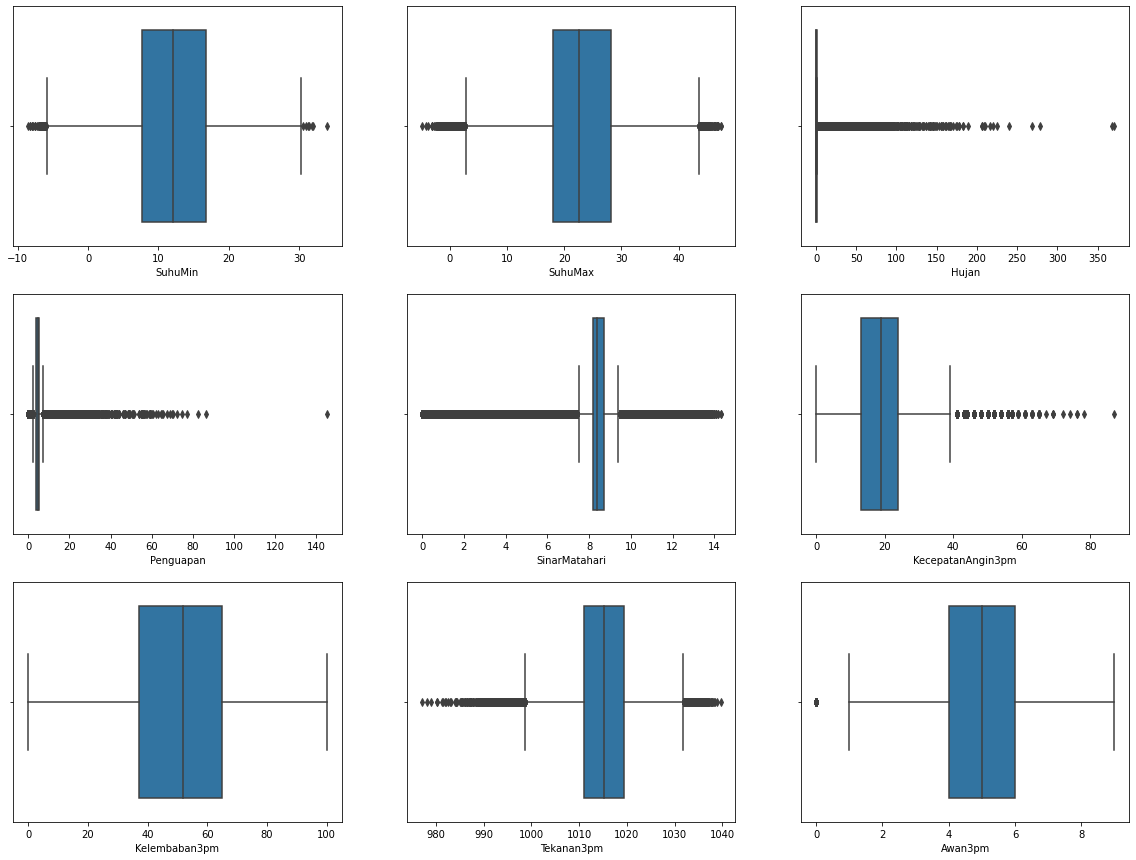

In [ ]:
def outliers(x) :
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  low = q1 - (1.5*iqr)
  up = q3 + (1.5*iqr)

  return low, up

#melihat batas bawah dan atas outliers
suhumin_low, suhumin_up = outliers(numdata['SuhuMin'])
suhumax_low, suhumax_up = outliers(numdata['SuhuMax'])
hujLow, hujUp = outliers(numdata['Hujan'])
penguapanLow, penguapanUp = outliers(numdata['Penguapan'])
sinarmatahariLow, sinarmatahariUp = outliers(numdata['SinarMatahari'])
kecepatananginLow, kecepatananginUp = outliers(numdata['KecepatanAngin3pm'])
kelembabanLow, kelembabanUp = outliers(numdata['Kelembaban3pm'])
tekananLow, tekananUp = outliers(numdata['Tekanan3pm'])
awanLow, awanUp = outliers(numdata['Awan3pm'])
suhuLow, suhuUp = outliers(numdata['Suhu3pm'])

fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (20,15))
for i, ax in zip(numdata.columns, axes.flat) :
  sns.boxplot(x=numdata[i], ax=ax)
plt.show()

Korelasi

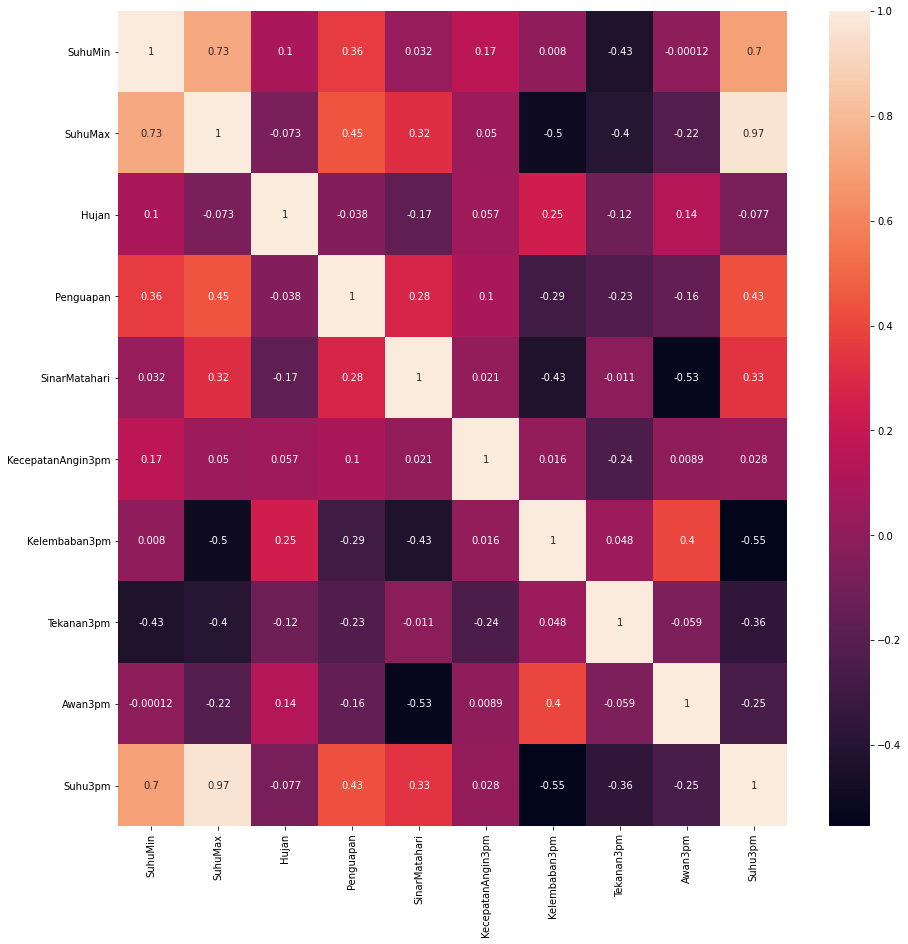

In [ ]:
corr = numdata.corr()

plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True)

Normalisasi

In [ ]:
columns_new = numdata.columns

In [ ]:
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(numdata)
norm_data_scalled = pd.DataFrame(norm_data, columns = columns_new)

norm_data_scalled

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMarahari,KecepatanAngin3pm,Kelembaban3pm,Tekanan3pm,Awan3pm,Suhu3pm,SinarMatahari
0,0.445755,0.389635,0.012938,0.033103,NaN,0.149425,0.76,0.6624,0.555556,0.391555,0.587413
1,0.412736,0.418426,0.021563,0.017931,NaN,0.229885,0.61,0.6000,0.555556,0.401152,0.517483
2,0.629717,0.706334,0.000000,0.033103,NaN,0.298851,0.42,0.6096,0.555556,0.671785,0.587413
3,0.372642,0.562380,0.000000,0.057931,NaN,0.218391,0.17,0.6368,0.777778,0.548944,0.727273
4,0.339623,0.481766,0.000000,0.024828,NaN,0.218391,0.48,0.6016,0.666667,0.451056,0.881119
...,...,...,...,...,...,...,...,...,...,...,...
109090,0.674528,0.547025,0.000000,0.049655,NaN,0.298851,0.70,0.6480,0.666667,0.527831,0.622378
109091,0.570755,0.575816,0.000000,0.033103,NaN,0.218391,0.52,0.6256,0.555556,0.571977,0.587413
109092,0.377358,0.483685,0.004313,0.033103,NaN,0.149425,0.51,0.5360,0.555556,0.483685,0.587413
109093,0.455189,0.664107,0.000000,0.053793,NaN,0.298851,0.18,0.6192,0.111111,0.664107,0.783217


K-Means

In [ ]:
def euclidean_distance (x1,x2) :
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
class KMeans_scratch :
    def __init__(self, K=2, maks_iteration=150):
        self.K = K
        self.maks_iteration = maks_iteration
        self.centroids = []
        self.clusters = [[] for i in range(self.K)]

    def predict(self, X) :
        self.X = X
        self.baris , self.column = X.shape

        # RANDOM CENTROID
        centroid_indexes = np.random.choice(self.baris,self.K,replace=False)
        for index in centroid_indexes :
            self.centroids.append(self.X[index])

        # ITERASI SEBANYAK MAKS ITERASI ATAU CENTROID TIDAK BERUBAH POSISI
        for i in range(self.maks_iteration) :

            # MENENTUKAN CLUSTER ATAU CENTROID TERDEKAT SETIAP TITIK
            clusters = [[] for i in range(self.K)]
            for idx, row in enumerate(self.X) :
                # MENCARI CENTROID TERDEKAT DENGAN MEMBANDINGKAN JARAK CENTROID
                closest_centroids_index = self.select_nearest_centroid(row)
                clusters[closest_centroids_index].append(idx)

            self.clusters = clusters

            # UPDATE CENTROID
            old_centroids = self.centroids
            self.centroids = self.generate_new_centroids()

            # CEK APAKAH CENTROID BERUBAH ATAU TIDAK
            isChange = False
            for i,old_centroid in enumerate(old_centroids) :
                # MENGHITUNG JARAK OLD CENTROID DAN NEW CENTROID
                distance = euclidean_distance(old_centroid, self.centroids[i])
                if (distance != 0) :
                    isChange = True
            if (isChange == False) :
                break

        # MENENTUKAN LABEL KLASTERISASI
        labels = self.generate_labels()
        return labels

    def select_nearest_centroid(self, row) :
        distance_to_all_centroids = [euclidean_distance(row,centroid) for centroid in self.centroids]
        return np.argmin(distance_to_all_centroids)

    def generate_new_centroids(self) :
        centroids = np.zeros((self.K, self.column))
        for cluster_idx, cluster in enumerate(self.clusters) :
            new_centroids = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = new_centroids
        return centroids

    def generate_labels(self) :
        labels = np.empty(self.baris)
        for cluster_idx, cluster in enumerate(self.clusters):
            for row in cluster:
                labels[row] = cluster_idx
        return labels

Eksperimen #1

In [ ]:
data1 = data.loc[:, ("SuhuMin", "Suhu3pm")]
data1.head()

,SuhuMin,Suhu3pm
0,10.4,15.0
1,9.0,15.5
2,18.2,29.6
3,7.3,23.2
4,5.9,18.1


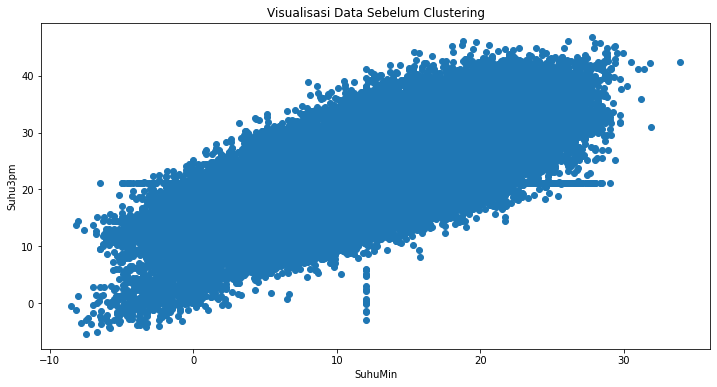

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data1.iloc[:,0] , data1.iloc[:,1] )
ax.set_xlabel(data1.columns[0])
ax.set_ylabel(data1.columns[1])
plt.title("Visualisasi Data Sebelum Clustering")
plt.show()

Menentukan Nilai K

In [ ]:
X1 = data1.to_numpy()
X1.shape

(109095, 2)

In [ ]:
k_range = range(1,10)
sse = []
for i in k_range :
    km = KMeans(n_clusters=i)
    km.fit(X1)
    sse.append(km.inertia_)
sse

[9507920.954369497,
 4094426.7343742405,
 2787081.612721429,
 2257866.306868602,
 1863246.9899192827,
 1589148.9843132128,
 1348383.241780993,
 1202618.0278074094,
 1080130.1921143492]

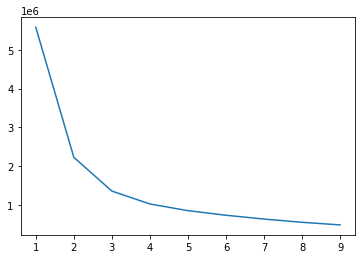

In [ ]:
plt.figure()
plt.plot(k_range,sse)

Clustering

In [ ]:
model = KMeans_scratch(K=3,maks_iteration=10)
y1_pred = model.predict(X1)

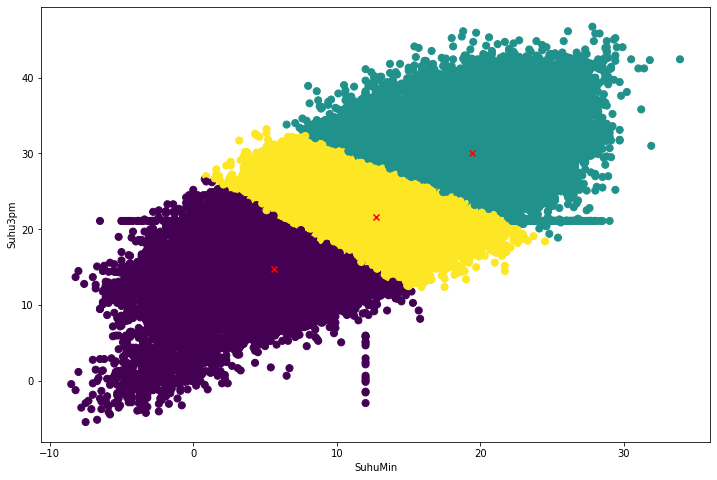

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X1[:, 0], X1[:, 1], c=y1_pred, s=50)

centroid = model.centroids
plt.scatter(centroid[:, 0], centroid[:, 1], c='red',marker="x", linewidths=2)
plt.xlabel(data1.columns[0])
plt.ylabel(data1.columns[1])
plt.show()

Eksperimen 2

In [ ]:
data2 = data.loc[:, ("SuhuMin", "Awan3pm")]
data2.head()

,SuhuMin,Awan3pm
0,10.4,5.0
1,9.0,5.0
2,18.2,5.0
3,7.3,7.0
4,5.9,6.0


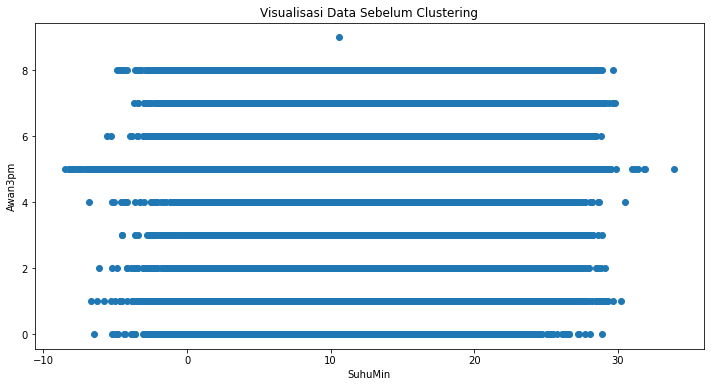

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data2.iloc[:,0] , data2.iloc[:,1] )
ax.set_xlabel(data2.columns[0])
ax.set_ylabel(data2.columns[1])
plt.title("Visualisasi Data Sebelum Clustering")
plt.show()

Menentukan Nilai K

In [ ]:
X2 = data2.to_numpy()
X2.shape

(109095, 2)

In [ ]:
k_range = range(1,10)
sse = []
for i in k_range :
    km = KMeans(n_clusters=i)
    km.fit(X2)
    sse.append(km.inertia_)
sse

[4891794.860873551,
 1962584.2570280097,
 1218287.5078674874,
 931403.4102010145,
 776598.2740816902,
 656177.3131547056,
 552842.0380412566,
 483834.81341772823,
 421799.2568882001]

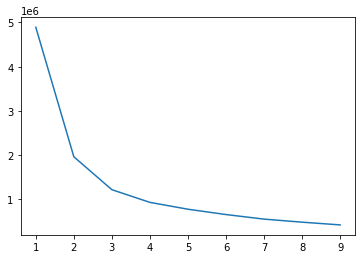

In [ ]:
plt.figure()
plt.plot(k_range,sse)

Clustering

In [ ]:
model = KMeans_scratch(K=4,maks_iteration=10)
y2_pred = model.predict(X2)

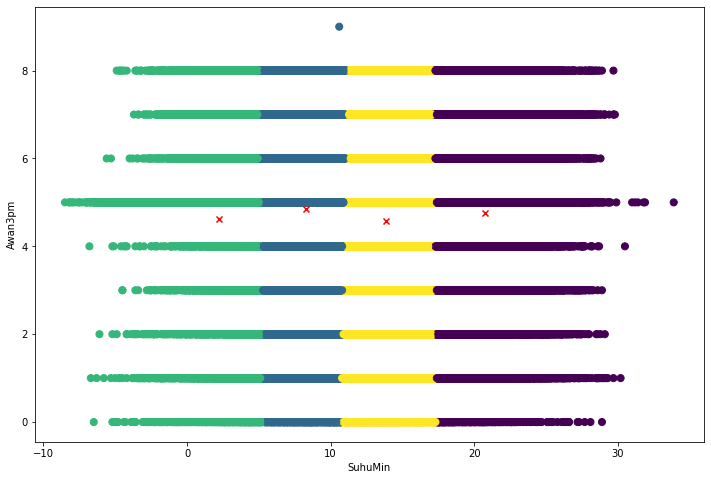

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X2[:, 0], X2[:, 1], c=y2_pred, s=50)

centroid = model.centroids
plt.scatter(centroid[:, 0], centroid[:, 1], c='red',marker="x", linewidths=2)
plt.xlabel(data2.columns[0])
plt.ylabel(data2.columns[1])
plt.show()

Evaluasi

In [ ]:
score_data1 = silhouette_score(X1,y1_pred)
score_data2 = silhouette_score(X2,y2_pred)

In [ ]:
print("score eksperimen 1 : " + str(score_data1))
print("score eksperimen 2 : " + str(score_data2))

score eksperimen 1 : 0.4343302012832219
score eksperimen 2 : 0.350962768993057
